In [19]:
import numpy as np

print(np.__version__)


1.26.4


In [ ]:
numpy.a

In [99]:
from sklearn import datasets #Import datasets module from scikit-learn
datasets.load_*?

datasets.load_breast_cancer
datasets.load_diabetes
datasets.load_digits
datasets.load_files
datasets.load_iris
datasets.load_linnerud
datasets.load_sample_image
datasets.load_sample_images
datasets.load_svmlight_file
datasets.load_svmlight_files
datasets.load_wine

In [103]:
diabetes = datasets.load_diabetes()
diabetes.DESCR
# digits = datasets.load_digits()
# digits.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [1]:
import argparse
import numpy as np
from scipy import misc 
from sklearn import cluster
import matplotlib.pyplot as plt

In [2]:
def build_arg_parser():
 parser = argparse.ArgumentParser(description='Compress the input image using clustering')
 parser.add_argument("--input-file", dest="input_file", required=True, help="Input image")
 parser.add_argument("--num-bits", dest="num_bits", required=False, type=int, help="Number of bits used to represent each pixel")
 return parser

In [3]:
def compress_image(img, num_clusters):
 # Convert input image into (num_samples, num_features) 
 # array to run kmeans clustering algorithm 
 X = img.reshape((-1, 1)) 
 # Run kmeans on input data
 kmeans = cluster.KMeans(n_clusters=num_clusters, n_init=4, random_state=5)
 kmeans.fit(X)
 centroids = kmeans.cluster_centers_.squeeze()
 labels = kmeans.labels_
 # Assign each value to the nearest centroid and 
 # reshape it to the original image shape
 input_image_compressed = np.choose(labels, centroids).reshape(img.shape)
 return input_image_compressed

In [4]:
def plot_image(img, title):
 vmin = img.min()
 vmax = img.max()
 plt.figure()
 plt.title(title)
 plt.imshow(img, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In [11]:
if __name__=='__main__':
    args = build_arg_parser().parse_args()
    input_file = args.input_file
    num_bits = args.num_bits
    if not 1 <= num_bits <= 8:
        raise TypeError('Number of bits should be between 1 and 8')
    
    num_clusters = np.power(2, num_bits)
    # Print compression rate
    compression_rate = round(100 * (8.0 - args.num_bits) / 8.0, 2)
    print("\nThe size of the image will be reduced by a factor of", 8.0/args.num_bits)
    print("\nCompression rate = " + str(compression_rate) + "%")

usage: ipykernel_launcher.py [-h] --input-file INPUT_FILE
                             [--num-bits NUM_BITS]
ipykernel_launcher.py: error: the following arguments are required: --input-file


SystemExit: 2

In [16]:
# Load input image
input_image = misc.imread(input_file, True).astype(np.uint8)
# original image 
plot_image(input_image, 'Original image')

AttributeError: scipy.misc is deprecated and has no attribute imread.

In [14]:
# compressed image 
input_image_compressed = compress_image(input_image, num_clusters)
plot_image(input_image_compressed, 'Compressed image; compression rate = '  + str(compression_rate) + '%')
plt.show()

NameError: name 'input_image' is not defined

In [17]:
python vector_quantization.py --input-file flower_image.jpg  --num-bits 4

SyntaxError: invalid syntax (34992470.py, line 1)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd 

In [27]:
# import utilities
# data = utilities.load_data('data_multivar.txt')
lol_champions = pd.read_csv("data/LoL_champions.csv",header=0)

lol_champions.head()

# num_clusters = 4

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.0,0.0,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.0,0.8,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.0,0.0,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.2,0.7,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.5,0.8,62,3.75,2.125,0.625,0.625


In [84]:
lol_champions[0:]

,Name,Tags,Role,Range type,Resourse type,Base HP,HP per lvl,Base mana,Mana per lvl,Movement speed,...,Attack range,HP regeneration,HP regeneration per lvl,Mana regeneration,Mana regeneration per lvl,Attack damage,Attack damage per lvl,Attack speed per lvl,Attack speed,AS ratio
0,Aatrox,Fighter,Top,Melee,Blood Well,650,114,0,0.0,345,...,175,3.00,0.50,0.00,0.00,60,5.00,2.500,0.651,0.651
1,Ahri,"Mage,Assassin",Middle,Ranged,Mana,590,104,418,25.0,330,...,550,2.50,0.60,8.00,0.80,53,3.00,2.200,0.668,0.625
2,Akali,Assassin,"Top,Middle",Melee,Energy,600,119,200,0.0,345,...,125,9.00,0.90,50.00,0.00,62,3.30,3.200,0.625,0.625
3,Akshan,"Marksman,Assassin",Middle,Ranged,Mana,630,107,350,40.0,330,...,500,3.75,0.65,8.20,0.70,52,3.00,4.000,0.638,0.400
4,Alistar,"Tank,Support",Support,Melee,Mana,685,120,350,40.0,330,...,125,8.50,0.85,8.50,0.80,62,3.75,2.125,0.625,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Zeri,Marksman,Bottom,Ranged,Mana,600,110,250,45.0,330,...,500,3.25,0.70,6.00,0.80,56,2.00,2.000,0.658,0.625
163,Ziggs,Mage,"Bottom,Middle",Ranged,Mana,606,106,480,23.5,325,...,550,6.50,0.60,8.00,0.80,55,3.10,2.000,0.656,0.656
164,Zilean,"Support,Mage",Support,Ranged,Mana,574,96,452,50.0,335,...,550,5.50,0.50,11.35,0.80,52,3.00,2.130,0.658,0.625
165,Zoe,Mage,Middle,Ranged,Mana,630,106,425,25.0,340,...,550,7.50,0.60,8.00,0.65,58,3.30,2.500,0.658,0.625


In [53]:
lol_champions_tag=[]
for  tag in lol_champions["Tags"]:
    # print(tag)
    t = tag.rsplit(",")
    print(t[0])
    lol_champions_tag.append(t[0])
# lol_champions_tag

Fighter
Mage
Assassin
Marksman
Tank
Tank
Mage
Mage
Marksman
Marksman
Mage
Mage
Support
Fighter
Tank
Mage
Tank
Fighter
Marksman
Fighter
Mage
Tank
Marksman
Fighter
Fighter
Marksman
Tank
Assassin
Assassin
Assassin
Marksman
Mage
Fighter
Assassin
Tank
Fighter
Fighter
Fighter
Fighter
Marksman
Fighter
Fighter
Mage
Mage
Fighter
Fighter
Support
Support
Fighter
Fighter
Marksman
Marksman
Marksman
Marksman
Marksman
Mage
Mage
Assassin
Assassin
Mage
Fighter
Mage
Assassin
Marksman
Fighter
Marksman
Tank
Assassin
Fighter
Tank
Fighter
Mage
Marksman
Support
Mage
Tank
Mage
Tank
Assassin
Support
Marksman
Fighter
Mage
Assassin
Support
Fighter
Tank
Mage
Assassin
Fighter
Fighter
Tank
Fighter
Mage
Tank
Fighter
Tank
Support
Assassin
Marksman
Support
Tank
Fighter
Tank
Support
Fighter
Assassin
Fighter
Fighter
Mage
Marksman
Tank
Support
Support
Fighter
Assassin
Tank
Fighter
Tank
Tank
Marksman
Tank
Marksman
Support
Support
Mage
Mage
Mage
Tank
Mage
Assassin
Support
Marksman
Support
Marksman
Fighter
Fighter
Mage
Mark

In [56]:
m = lol_champions["Attack damage"]
a = lol_champions["Attack range"]
t = lol_champions_tag
#lol_champions["Role"]

In [59]:
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(lol_champions_tag)
label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(df)
print('Encoded labels:', encoded_labels)


Encoded labels: [1 2 0 3 5 5 2 2 3 3 2 2 4 1 5 2 5 1 3 1 2 5 3 1 1 3 5 0 0 0 3 2 1 0 5 1 1
 1 1 3 1 1 2 2 1 1 4 4 1 1 3 3 3 3 3 2 2 0 0 2 1 2 0 3 1 3 5 0 1 5 1 2 3 4
 2 5 2 5 0 4 3 1 2 0 4 1 5 2 0 1 1 5 1 2 5 1 5 4 0 3 4 5 1 5 4 1 0 1 1 2 3
 5 4 4 1 0 5 1 5 5 3 5 3 4 4 2 2 2 5 2 0 4 3 4 3 1 1 2 3 1 1 3 3 2 2 2 1 1
 2 2 1 1 1 3 2 1 1 1 1 4 5 0 3 2 4 2 2]


/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
type(a)

pandas.core.series.Series

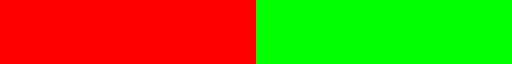

In [92]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#00FF00"])
cm_bright

/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_99303/2608404645.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(a, m, marker='o', cmap=cm_bright, edgecolors="k", s=30)


([], [])

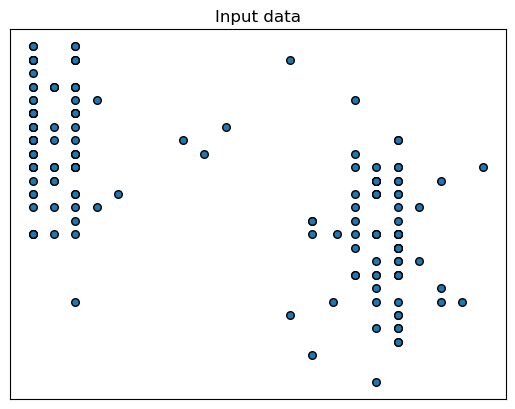

In [97]:
plt.figure()

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#00FF00"])

# plt.scatter(a, m, marker='o', facecolors='none', edgecolors='k', s=30)
plt.scatter(a, m, marker='o', cmap=cm_bright, edgecolors="k", s=30)


# x_min, x_max = min(a) - 1, max(a) + 1
# y_min, y_max = min(m) - 1, max(m) + 1
plt.title('Input data')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [73]:
df = pd.DataFrame({'damage':m,
    'range':a,
    'tag':encoded_labels})
df

,damage,range,tag
0,60,175,1
1,53,550,2
2,62,125,0
3,52,500,3
4,62,125,5
...,...,...,...
162,56,500,3
163,55,550,2
164,52,550,4
165,58,550,2


In [75]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split


In [77]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#00FF00"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

plt.tight_layout()
plt.show()

NameError: name 'datasets' is not defined

<Figure size 2700x900 with 0 Axes>

In [57]:
type(lol_champions["Attack range"])

pandas.core.series.Series

In [74]:
serias = {
    'damage':m,
    'range':a,
    'tag':encoded_labels}
serias
# df = pd.DataFrame(serias, columns=['damage', 'range', 'tag'], index=[1,2,3])
# df


{'damage': 0      60
 1      53
 2      62
 3      52
 4      62
        ..
 162    56
 163    55
 164    52
 165    58
 166    53
 Name: Attack damage, Length: 167, dtype: int64,
 'range': 0      175
 1      550
 2      125
 3      500
 4      125
       ... 
 162    500
 163    550
 164    550
 165    550
 166    575
 Name: Attack range, Length: 167, dtype: int64,
 'tag': array([1, 2, 0, 3, 5, 5, 2, 2, 3, 3, 2, 2, 4, 1, 5, 2, 5, 1, 3, 1, 2, 5,
        3, 1, 1, 3, 5, 0, 0, 0, 3, 2, 1, 0, 5, 1, 1, 1, 1, 3, 1, 1, 2, 2,
        1, 1, 4, 4, 1, 1, 3, 3, 3, 3, 3, 2, 2, 0, 0, 2, 1, 2, 0, 3, 1, 3,
        5, 0, 1, 5, 1, 2, 3, 4, 2, 5, 2, 5, 0, 4, 3, 1, 2, 0, 4, 1, 5, 2,
        0, 1, 1, 5, 1, 2, 5, 1, 5, 4, 0, 3, 4, 5, 1, 5, 4, 1, 0, 1, 1, 2,
        3, 5, 4, 4, 1, 0, 5, 1, 5, 5, 3, 5, 3, 4, 4, 2, 2, 2, 5, 2, 0, 4,
        3, 4, 3, 1, 1, 2, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3,
        2, 1, 1, 1, 1, 4, 5, 0, 3, 2, 4, 2, 2])}

([], [])

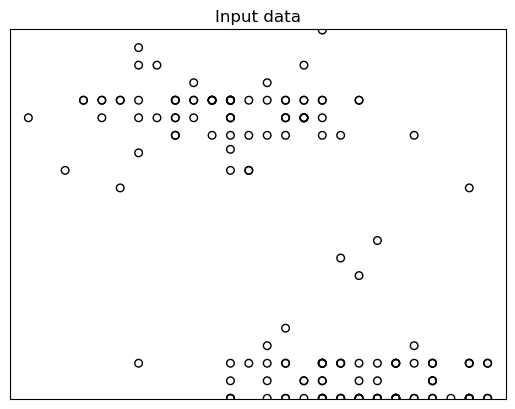

In [45]:
plt.figure()
plt.scatter(m, a, marker='o', 
 facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(m) - 1, max(m) + 1
y_min, y_max = min(a) - 1, max(a) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [23]:
plt.figure()
plt.scatter(data[:,0], data[:,1], marker='o', 
 facecolors='none', edgecolors='k', s=30)
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

NameError: name 'data' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(data)

In [ ]:
# Step size of the mesh
step_size = 0.01
# Plot the boundaries
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_
size), np.arange(y_min, y_max, step_size))
# Predict labels for all points in the mesh
predicted_labels = kmeans.predict(np.c_[x_values.ravel(), y_
values.ravel()])

# SVM

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

In [1]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Library for visualization

from sklearn import datasets

iris = datasets.load_iris()
X_w = iris.data[:, :2] #load the first two features of the iris data
y_w = iris.target #load the target of the iris data

#select only the first two classes for both the feature set and target set
#the first two classes of the iris dataset: Setosa (0), Versicolour (1)


In [8]:
# iris
# X_w
# y_w
X_0 = X_w[y_w == 0]
X_1 = X_w[y_w == 1]

X = X_w[y_w < 2]
y = y_w[y_w < 2]

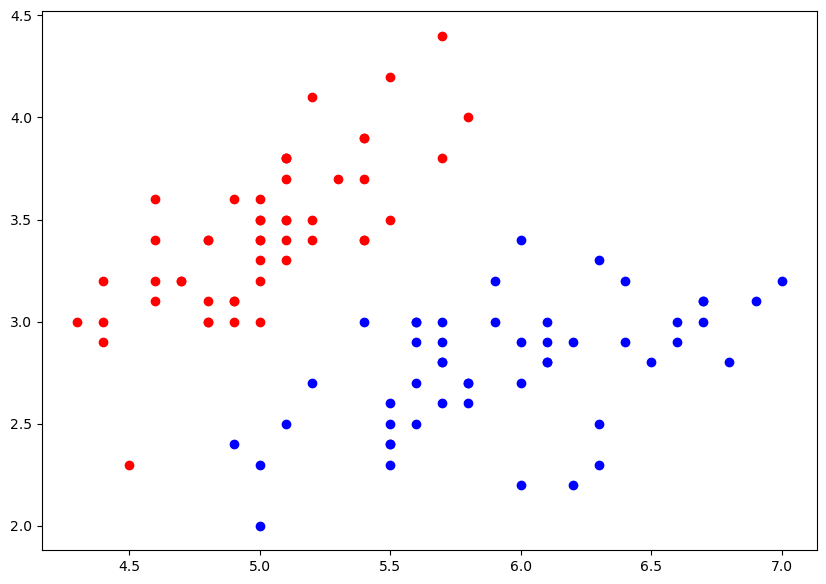

In [10]:



#to visualize within IPython:
%matplotlib inline
plt.figure(figsize=(10,7)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7,stratify=y)

In [37]:
X_test

array([[6.2, 2.9],
       [5.1, 3.3],
       [7. , 3.2],
       [5.1, 2.5],
       [5. , 3.6],
       [6. , 3.4],
       [5.8, 4. ],
       [5.1, 3.4],
       [5.1, 3.8],
       [4.9, 2.4],
       [6. , 2.9],
       [5. , 2. ],
       [4.6, 3.1],
       [5. , 3. ],
       [6.1, 2.8],
       [6.1, 3. ],
       [5.2, 3.4],
       [5.1, 3.8],
       [5.7, 2.8],
       [4.6, 3.2]])

In [ ]:
from sklearn.svm import SVC

svm_inst = SVC(kernel='linear')


svm_inst.fit(X_train,y_train)

y_pred = svm_inst.predict(X_test)


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [24]:
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])

ymin, ymax = np.percentile(X[:, 1], [0, 100])
print(xmin, xmax)
print(ymin, ymax)


4.3 7.0
2.0 4.4


In [35]:
x_linespace = np.linspace(xmin, xmax)
y_linespace = np.linspace(ymin, ymax)
length = len(x_linespace)
lenthy = len(y_linespace)
print(length,lenthy)

product_xy = product(x_linespace, y_linespace)
product_xy

for xx, yy in product_xy:
    print(xx,yy)

50 50
4.3 2.0
4.3 2.048979591836735
4.3 2.0979591836734692
4.3 2.146938775510204
4.3 2.195918367346939
4.3 2.2448979591836733
4.3 2.293877551020408
4.3 2.342857142857143
4.3 2.391836734693878
4.3 2.440816326530612
4.3 2.489795918367347
4.3 2.538775510204082
4.3 2.5877551020408163
4.3 2.636734693877551
4.3 2.685714285714286
4.3 2.7346938775510203
4.3 2.783673469387755
4.3 2.83265306122449
4.3 2.8816326530612244
4.3 2.9306122448979592
4.3 2.979591836734694
4.3 3.0285714285714285
4.3 3.0775510204081633
4.3 3.126530612244898
4.3 3.1755102040816325
4.3 3.2244897959183674
4.3 3.273469387755102
4.3 3.3224489795918366
4.3 3.3714285714285714
4.3 3.4204081632653063
4.3 3.4693877551020407
4.3 3.518367346938776
4.3 3.5673469387755103
4.3 3.6163265306122447
4.3 3.66530612244898
4.3 3.7142857142857144
4.3 3.7632653061224492
4.3 3.812244897959184
4.3 3.8612244897959185
4.3 3.9102040816326533
4.3 3.959183673469388
4.3 4.0081632653061225
4.3 4.057142857142857
4.3 4.106122448979592
4.3 4.155102040816327

In [36]:

#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])
test_points

array([[4.3       , 2.        ],
       [4.3       , 2.04897959],
       [4.3       , 2.09795918],
       ...,
       [7.        , 4.30204082],
       [7.        , 4.35102041],
       [7.        , 4.4       ]])

In [38]:

#Predictions on the grid
test_preds = svm_inst.predict(test_points)

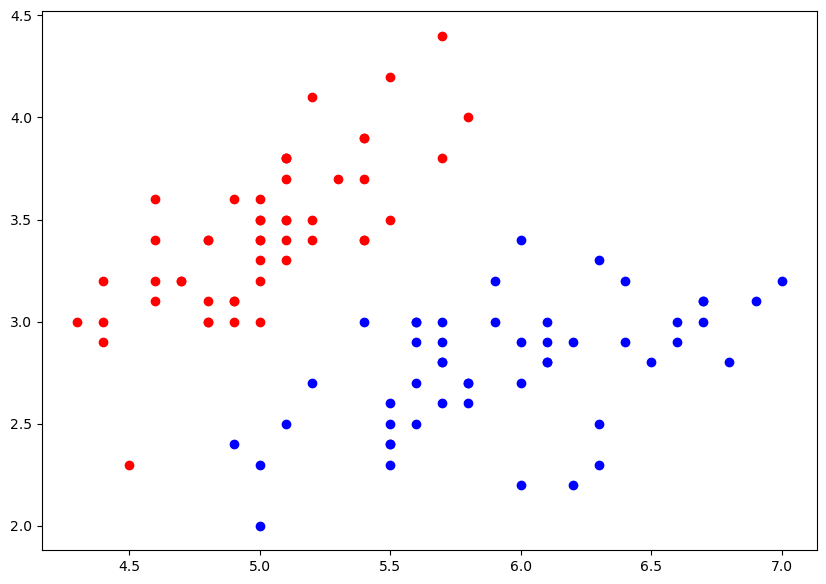

In [39]:
X_0 = X[y == 0]
X_1 = X[y == 1]
%matplotlib inline
plt.figure(figsize=(10,7)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
colors = np.array(['r', 'b'])


Text(0.5, 1.0, 'Linearly-separated classes')

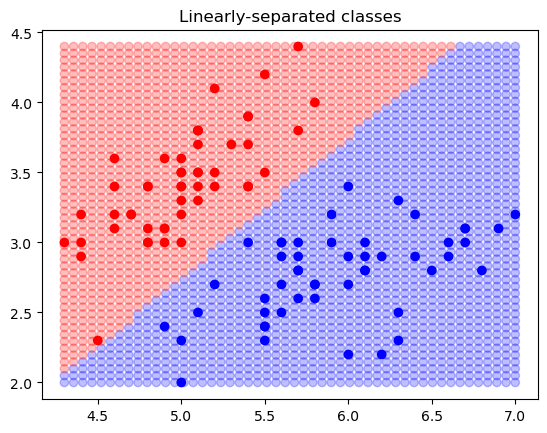

In [40]:

plt.scatter(test_points[:, 0], test_points[:, 1],
color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linearly-separated classes")

In [41]:
svm_inst.coef_

array([[ 2.22246001, -2.2213921 ]])

In [42]:
svm_inst.intercept_

array([-5.00384439])

In [43]:
svm_inst

# Traditionally, the SVC prediction performance is optimized over the following parameters:
# C, gamma, and the shape of the kernel. C describes the margin of the SVM and is set to one
# by default. The margin is the empty space on either side of the hyperplane with no class
# examples. If your dataset has many noisy observations, try higher Cs with cross-validation.
# C is proportional to error on the margin, and as C gets higher in value, the SVM will try to
# make the margin smaller.

SVC(kernel='linear')

# Optimizing an SVM

In [1]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris_X = iris.data[:,:2]
iris_X

iris_y = iris.target
iris_y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:

X = iris_X[iris_y != 0]
y = iris_y[iris_y != 0]
X
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X_1 = X[y == 1]
X_2 = X[y == 2]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC())])
svm_est

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [19]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(svc__gamma=gammas, svc__C=Cs)
param_grid

{'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.001, 0.01, 0.1, 1, 10]}

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,
random_state=7)
cv

StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None)

In [22]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [23]:
grid_cv.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

In [24]:
grid_cv.best_score_

0.8142857142857143

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid,
cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC())]),
                   param_distributions={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1,
                                                       10]})

In [26]:
rand_grid.best_params_

{'svc__gamma': 0.1, 'svc__C': 10}

In [27]:
from itertools import product
#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
#Grid/Cartesian product with itertools.product
print("{},{},{},{}".format(xmin,xmax,ymin,ymax))

4.9,7.9,2.0,3.8


In [33]:
grid_cv

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10]})

In [29]:
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin,
xmax), np.linspace(ymin, ymax))])
#Predictions on the grid
test_preds = grid_cv.predict(test_points)
test_preds

array([1, 1, 1, ..., 2, 2, 2])

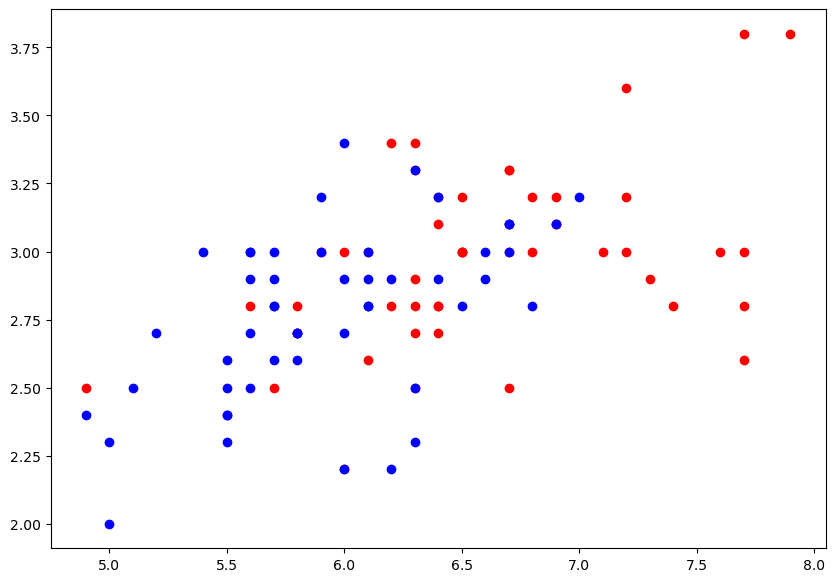

In [31]:
X_1 = X[y == 1]
X_2 = X[y == 2]
# %matplotlib inline
plt.figure(figsize=(10,7)) #change figure-size for easier viewing
plt.scatter(X_2[:,0],X_2[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
colors = np.array(['r', 'b'])


Text(0.5, 1.0, 'RBF-separated classes')

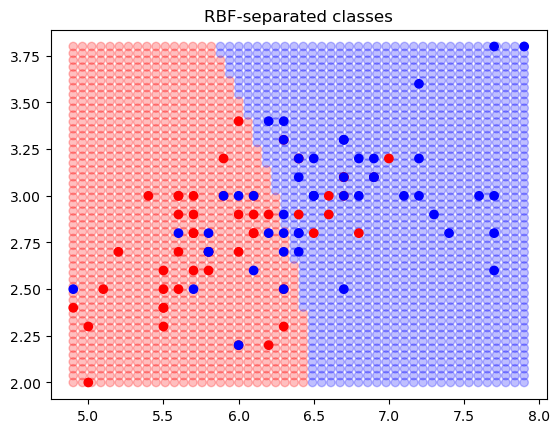

In [32]:

plt.scatter(test_points[:, 0], test_points[:, 1],
color=colors[test_preds-1], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y-1])
plt.title("RBF-separated classes")

# Multiclass classification with SVM

In [34]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2] #load the first two features of the iris data
y = iris.target #load the target of the iris data
X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=7,stratify=y)

In [36]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

In [38]:
svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC()))])
svm_est

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', OneVsRestClassifier(estimator=SVC()))])

In [40]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(svc__estimator__gamma=gammas,
svc__estimator__C=Cs)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=7)

rand_grid = RandomizedSearchCV(svm_est,param_distributions=param_grid, cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC()))]),
                   param_distributions={'svc__estimator__C': [0.001, 0.01, 0.1,
                                                              1, 10],
                                        'svc__estimator__gamma': [0.001, 0.01,
                                                                  0.1, 1, 10]})

In [43]:
rand_grid.best_params_

{'svc__estimator__gamma': 1, 'svc__estimator__C': 1}

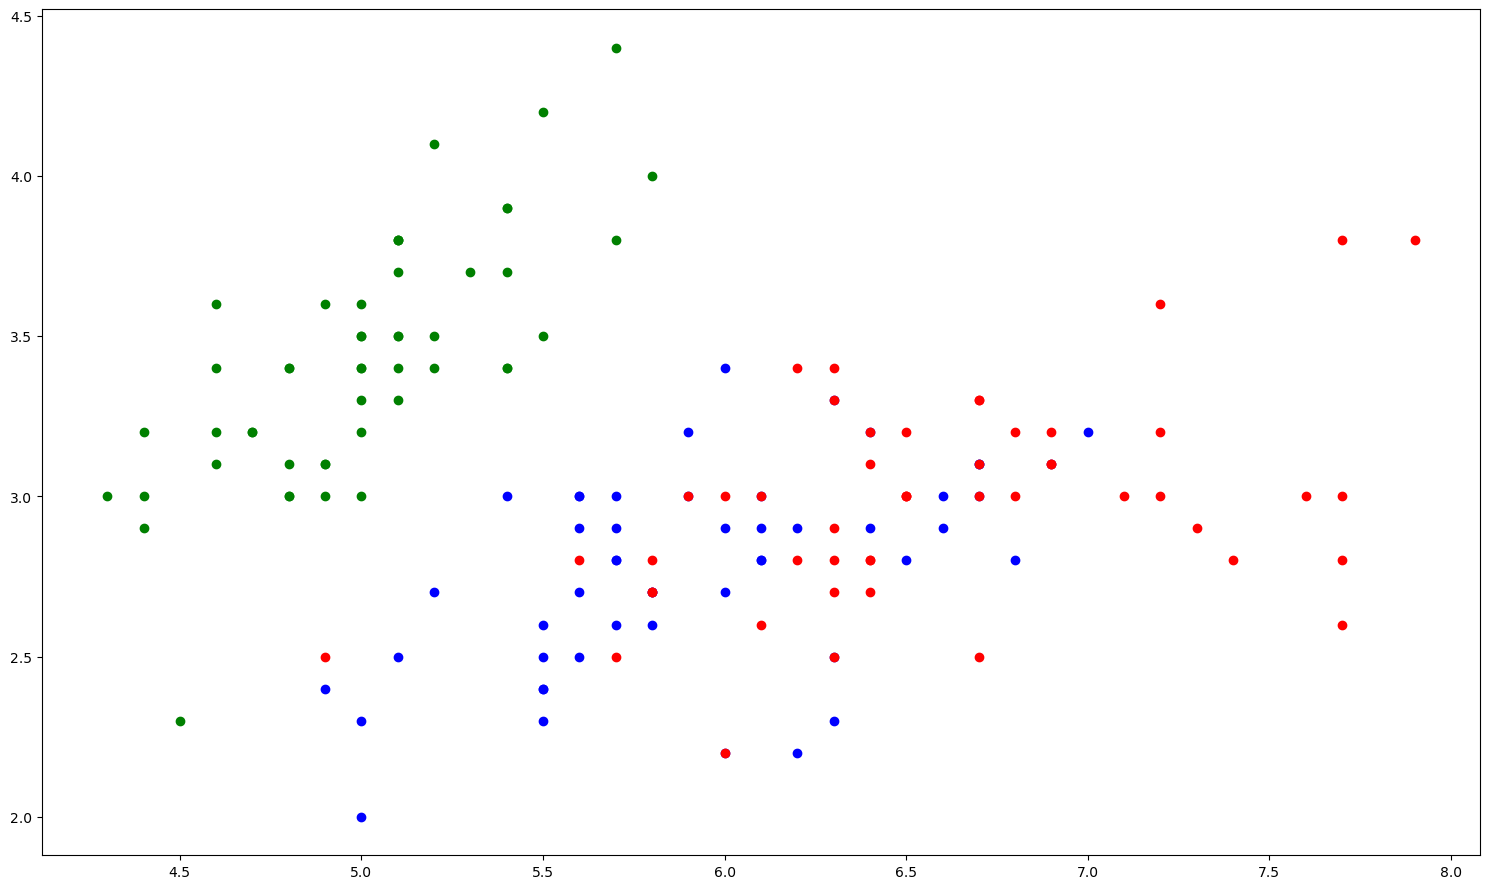

In [44]:
%matplotlib inline
from itertools import product
#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])
#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin,xmax,100), np.linspace(ymin, ymax,100))])


#Predictions on the grid
test_preds = rand_grid.predict(test_points)
plt.figure(figsize=(15,9)) #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'green')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'red')

colors = np.array(['g', 'b', 'r'])
plt.tight_layout()

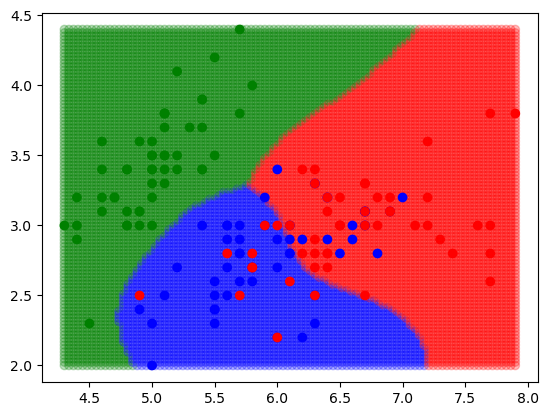

In [45]:
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds],alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])

# Support vector regression

In [46]:
#load the libraries we have been using
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
diabetes = datasets.load_diabetes()
# datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=7)

In [48]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVR()))])

In [49]:
Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1]
param_grid = dict(svc__estimator__gamma=gammas,svc__estimator__C=Cs)

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

rand_grid = RandomizedSearchCV(svm_est,param_distributions=param_grid,cv=5,n_iter=5,scoring='neg_mean_absolute_error')
rand_grid.fit(X_train, y_train)

/Users/james/Applications/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVR()))]),
                   n_iter=5,
                   param_distributions={'svc__estimator__C': [0.001, 0.01, 0.1,
                                                              1],
                                        'svc__estimator__gamma': [0.001, 0.01,
                                                                  0.1]},
                   scoring='neg_mean_absolute_error')

In [51]:
rand_grid.best_params_

{'svc__estimator__gamma': 0.01, 'svc__estimator__C': 1}

In [52]:
rand_grid.best_score_

-63.99541247484909